# Mug Detector with YOLOv5

## Setup

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15926, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 15926 (delta 20), reused 23 (delta 8), pack-reused 15880
Receiving objects: 100% (15926/15926), 14.66 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (10915/10915), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.0 MB/s eta 0

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics",api_key="0wGBdCSshGUJIvEzSONk")

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

## Get dataset from Roboflow

In [ ]:

rf = Roboflow(api_key="0wGBdCSshGUJIvEzSONk")
project = rf.workspace("naveen-msvuf").project("final_ds_crickvision")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/FINAL_DS_Crickvision-1 in yolov5pytorch:: 100%|██████████| 7193/7193 [00:06<00:00, 1164.69it/s]


## Train The Yolo Model








In [ ]:
!python train.py --img 416 --batch 64 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/FINAL_DS_Crickvision-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0

AttributeError: ignored

## Show Training Results

In [ ]:
# import shutil

# # Specify the folder path in Colab that you want to zip
# colab_folder_path = '/content/yolov5/runs/train/exp'

# # Create the zip file
# shutil.make_archive('Cricket detect1', 'zip', colab_folder_path)

# # Specify the zip file name
# zip_file_name = 'Cricket detect1.zip'

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import time

# # Add a time delay (e.g., 5 seconds)
# time_delay_seconds = 20
# time.sleep(time_delay_seconds)

In [ ]:
# # Copy the zip file to Google Drive
# drive_folder_path = '/content/drive/MyDrive'  # Change to the desired folder path in Google Drive
# shutil.copy(zip_file_name, drive_folder_path + '/' + zip_file_name)

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
# %load_ext tensorboard
# %tensorboard --logdir runs

## Prediction

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/FINAL_DS_Crickvision-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/723 /content/datasets/FINAL_DS_Crickvision-1/valid/images/_23_08_23_frame_11235_jpg.rf.35ce7c19f5b86176072ae5a845e1dcca.jpg: 416x256 1 ball, 1 bat, 43.3ms
image 2/723 /content/datasets/FINAL_DS_Crickvision-1/valid/images/_23_08_23_frame_11235_jpg.rf.f59da60e5614a75b7a2d8b370039da2e.jpg: 416x256 1 ball, 1

## Display Inference Images

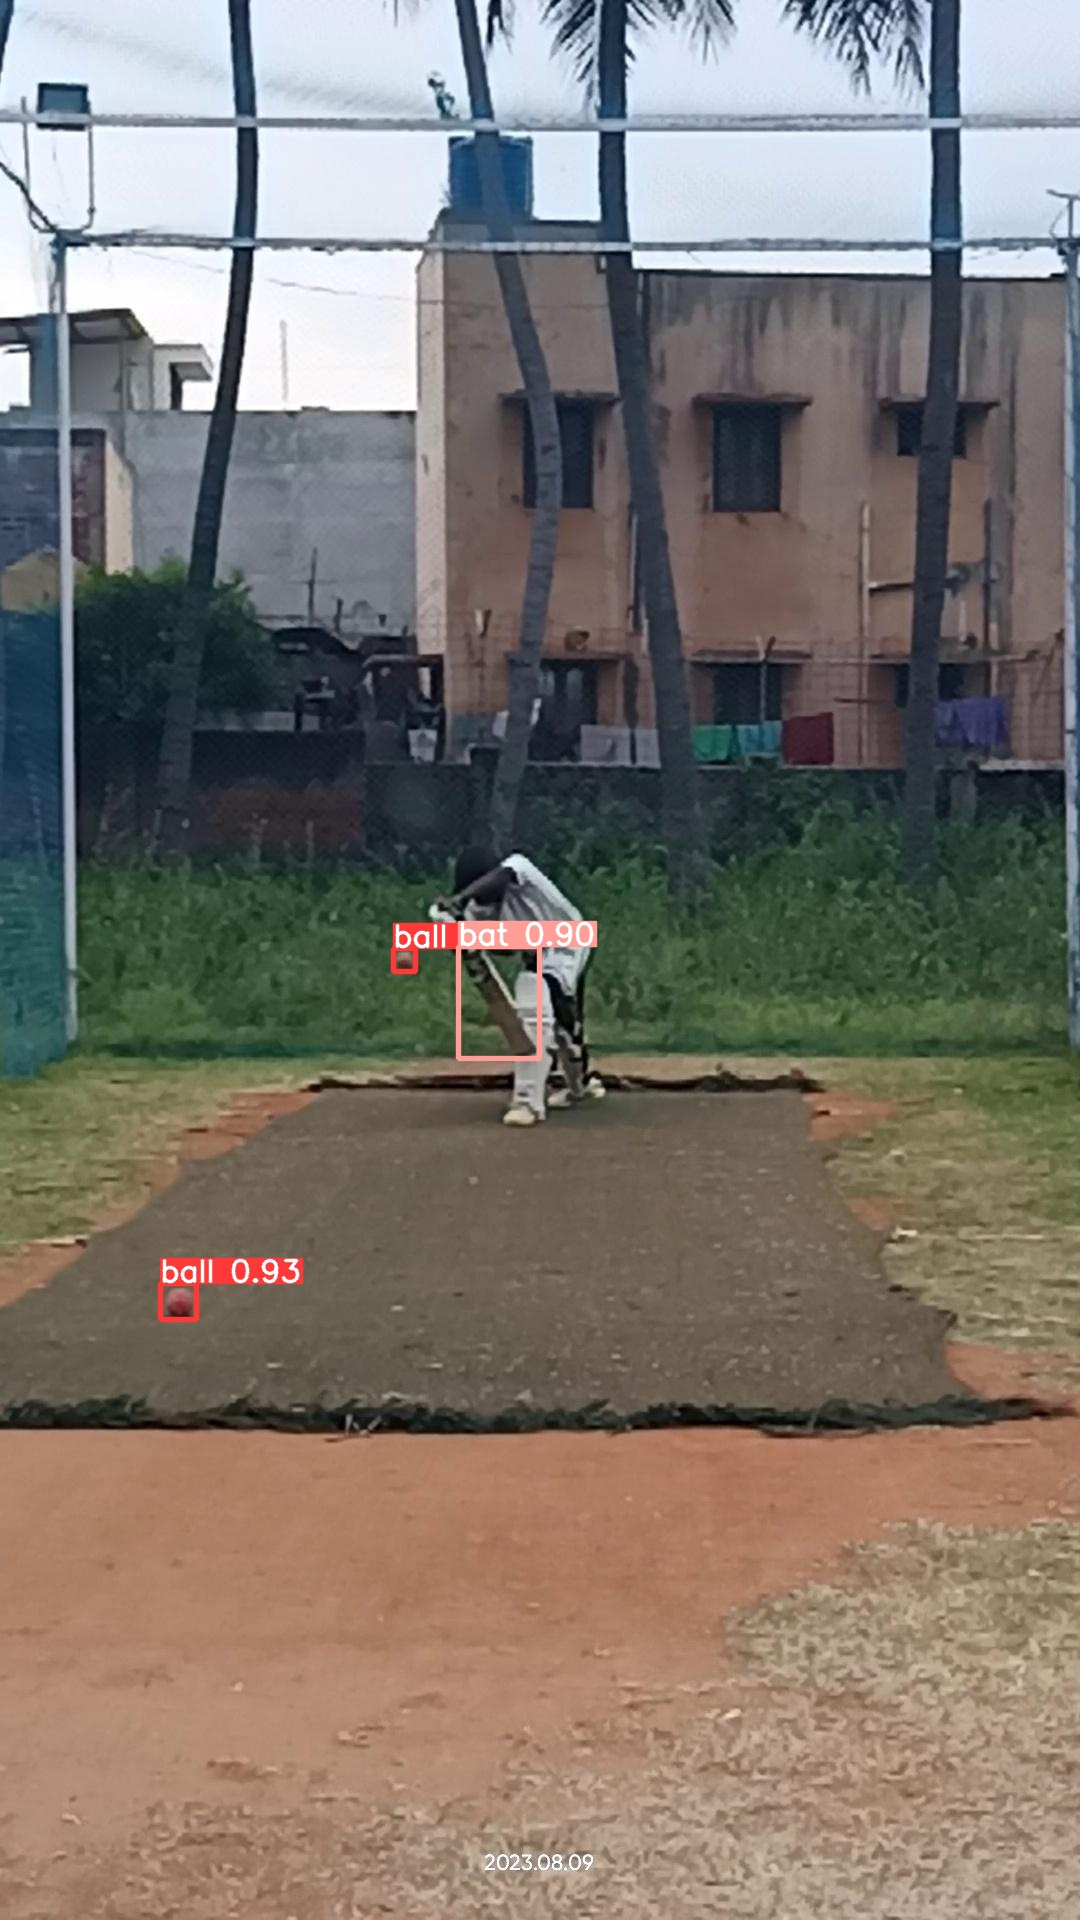

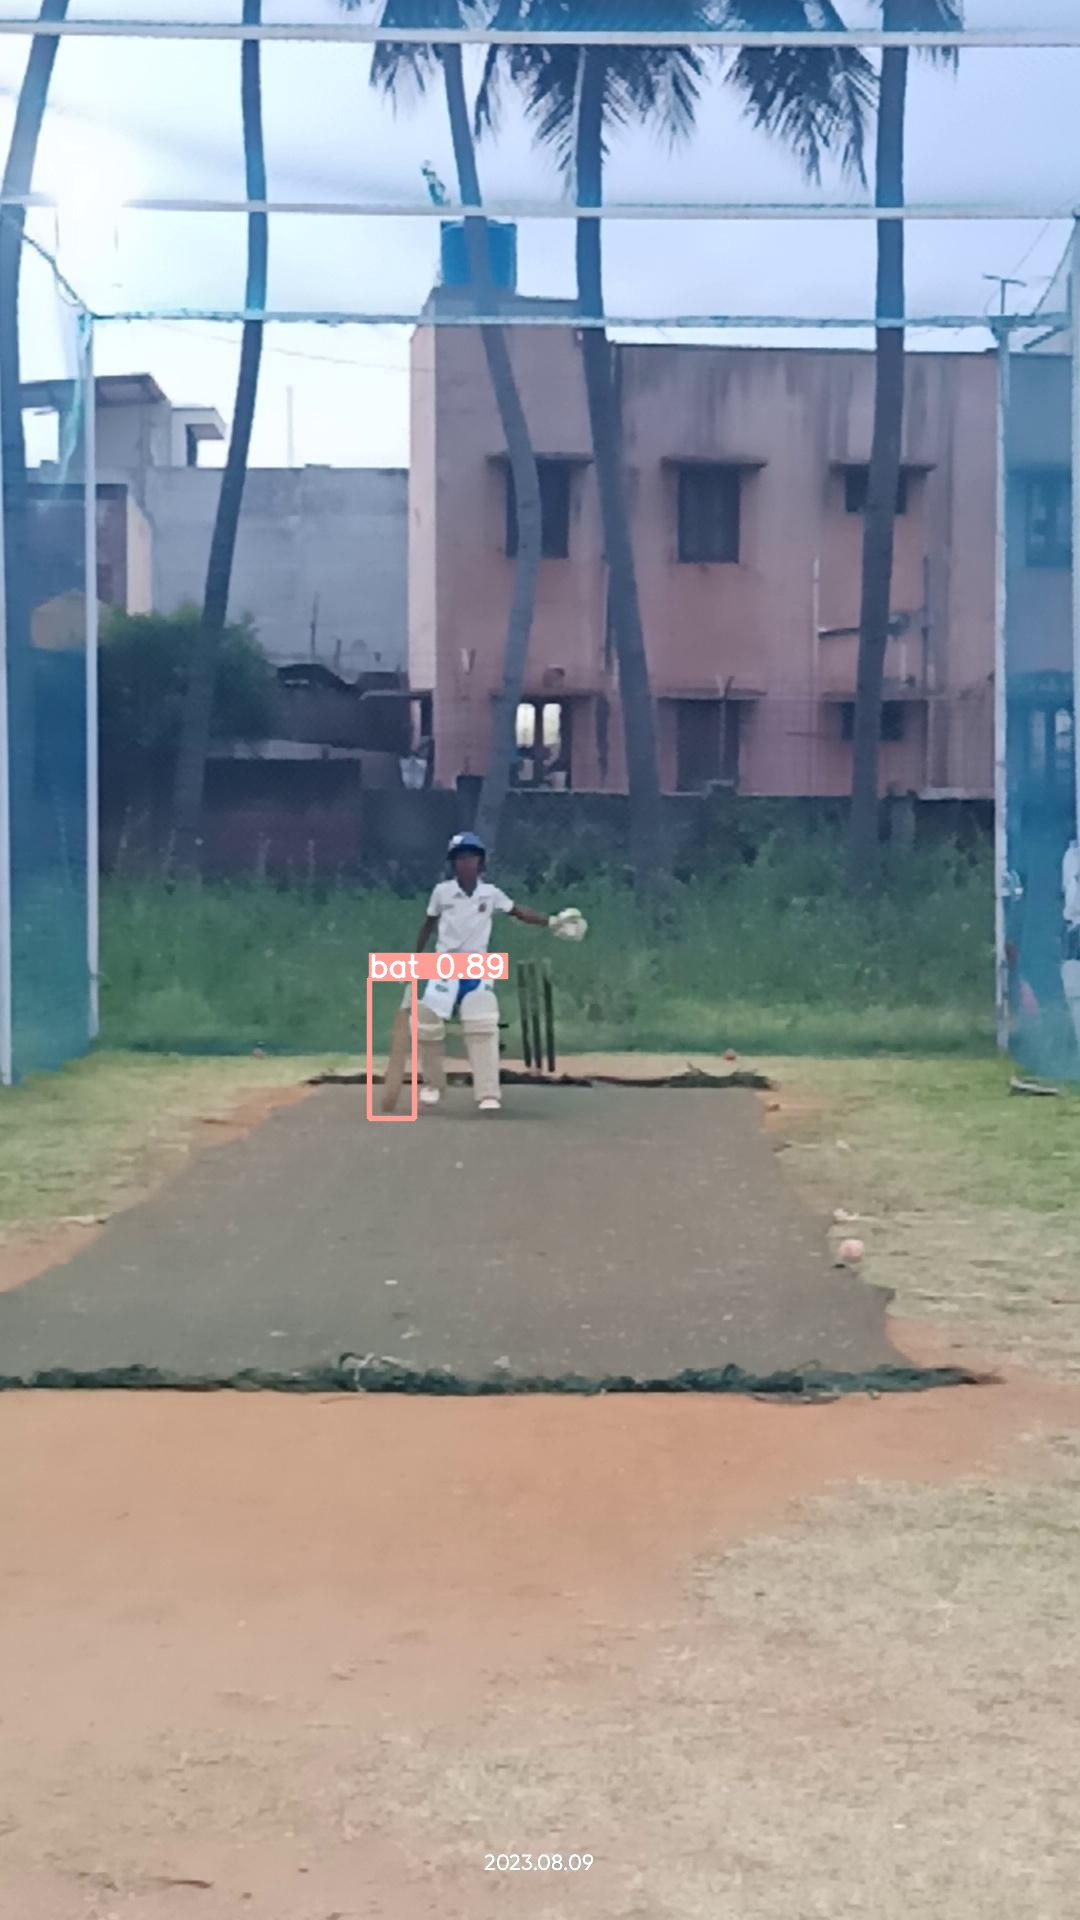

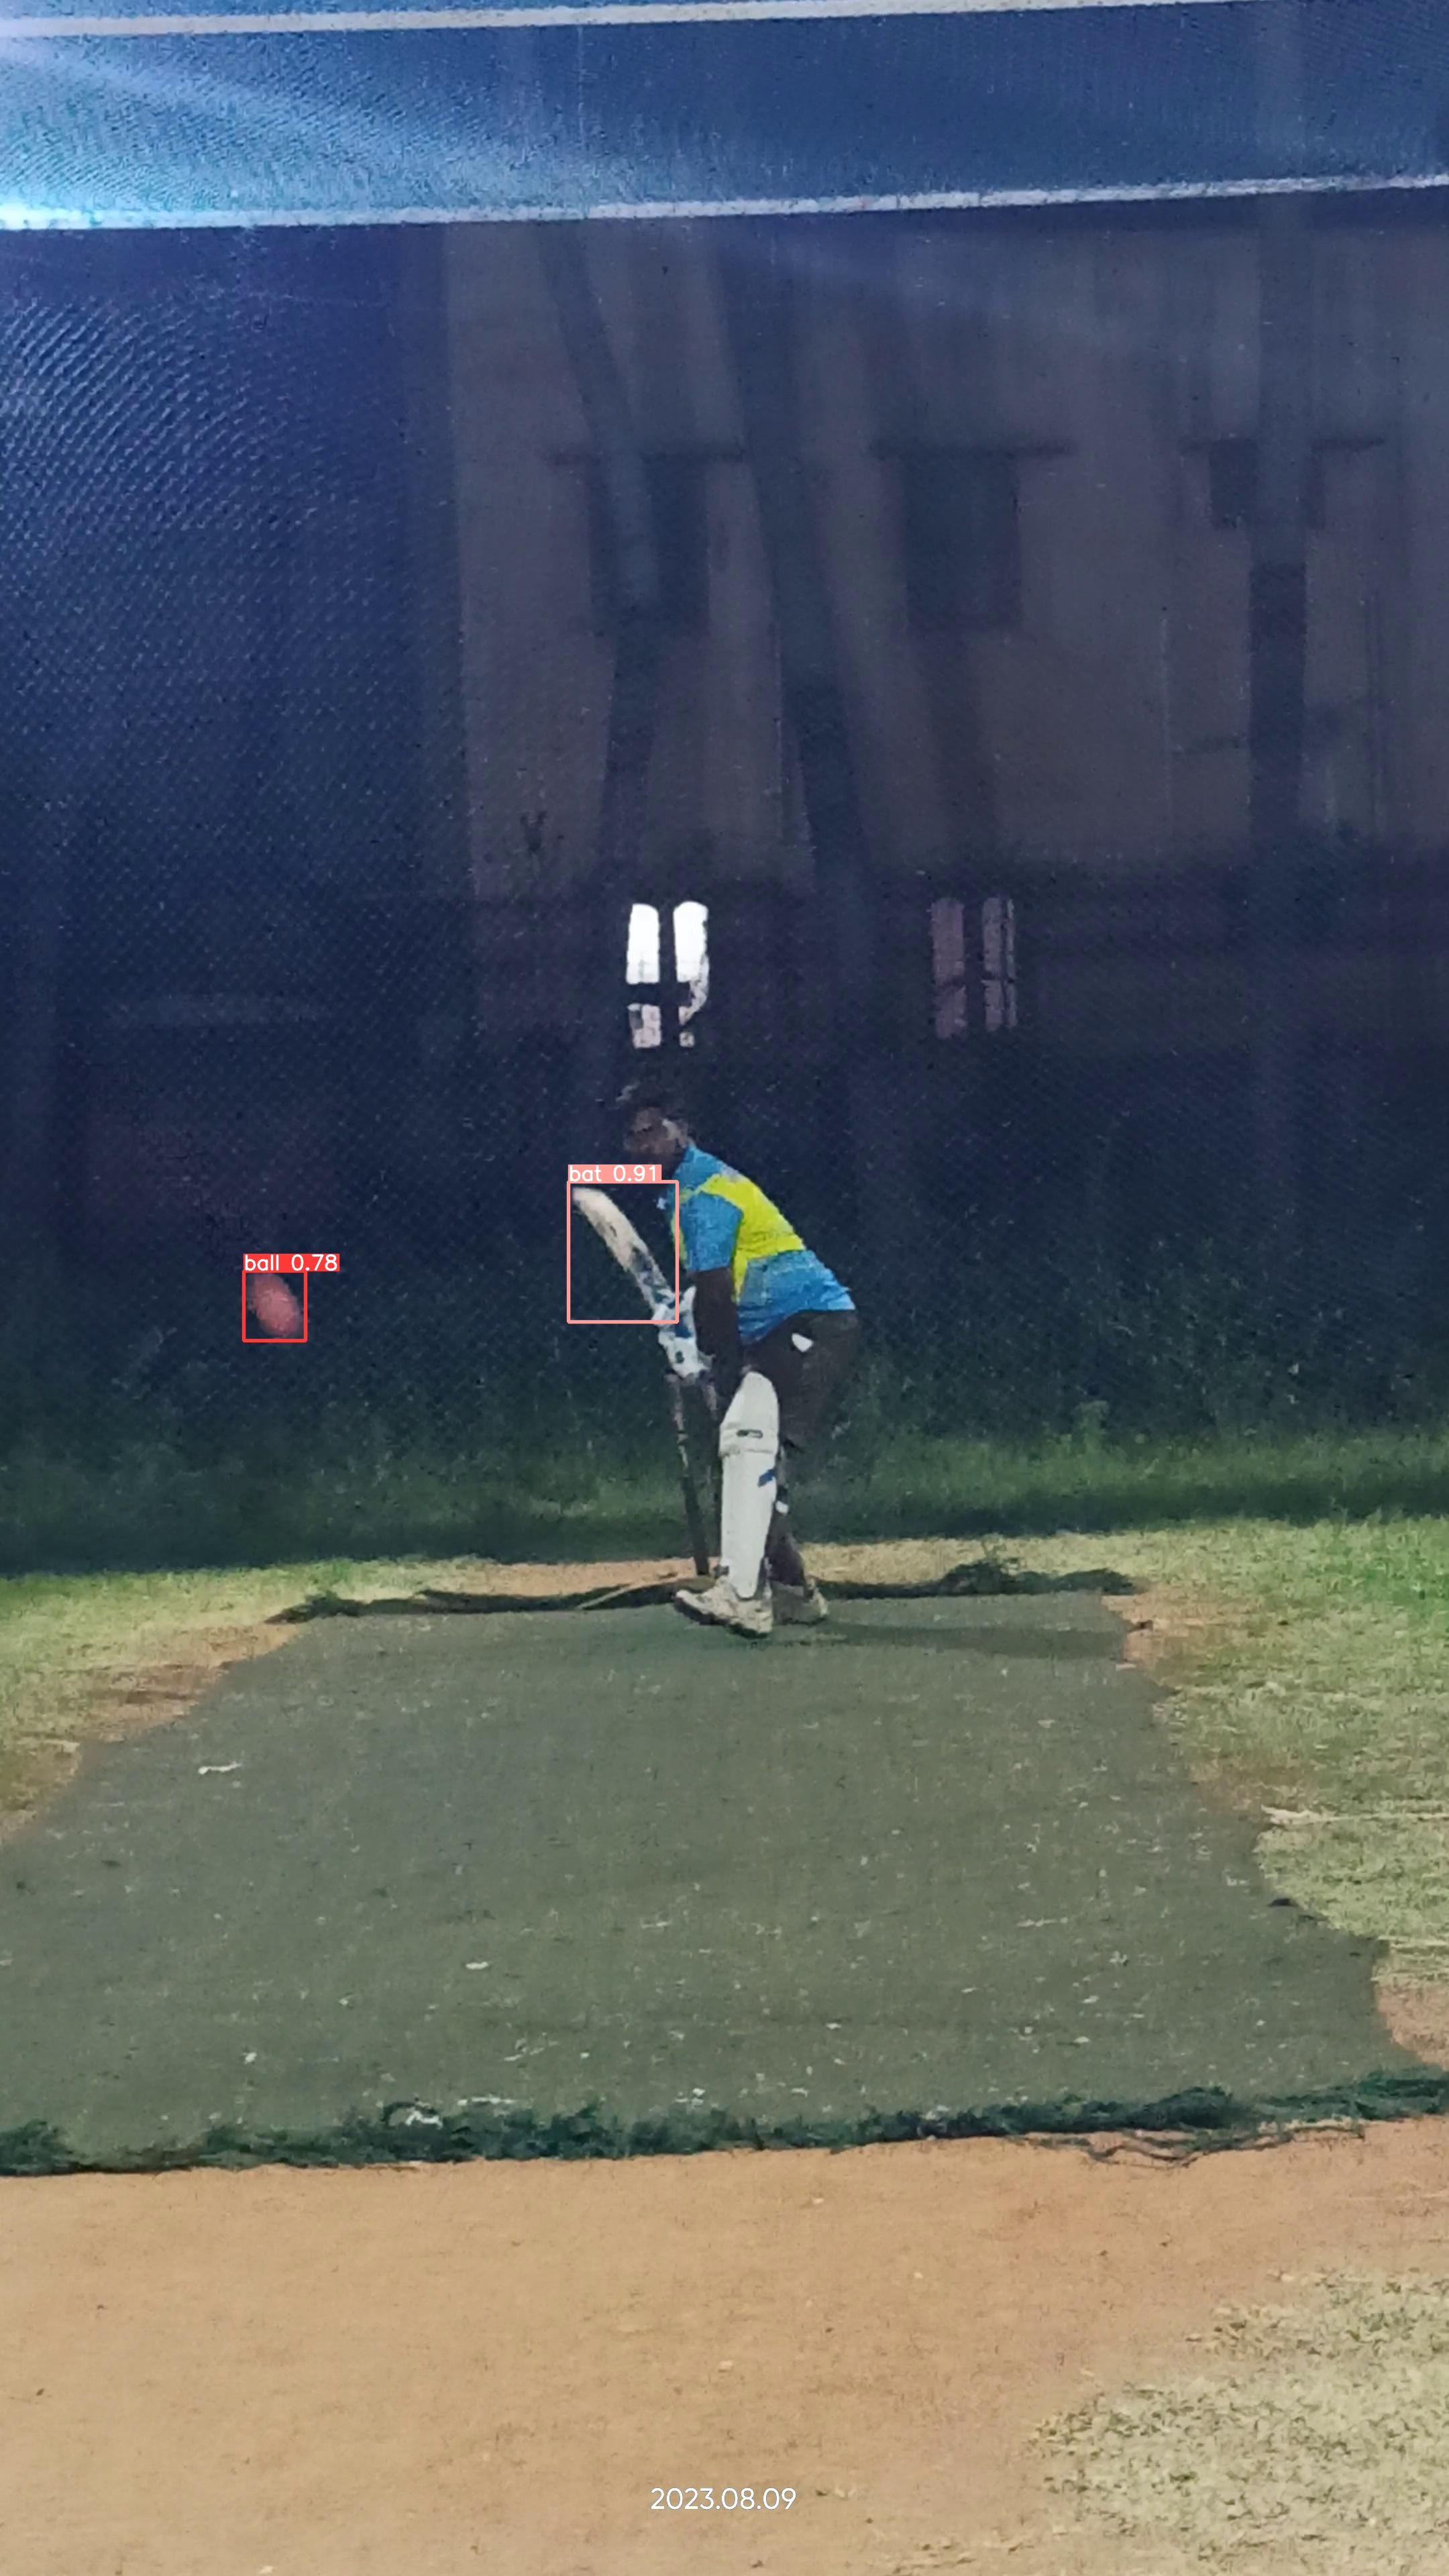

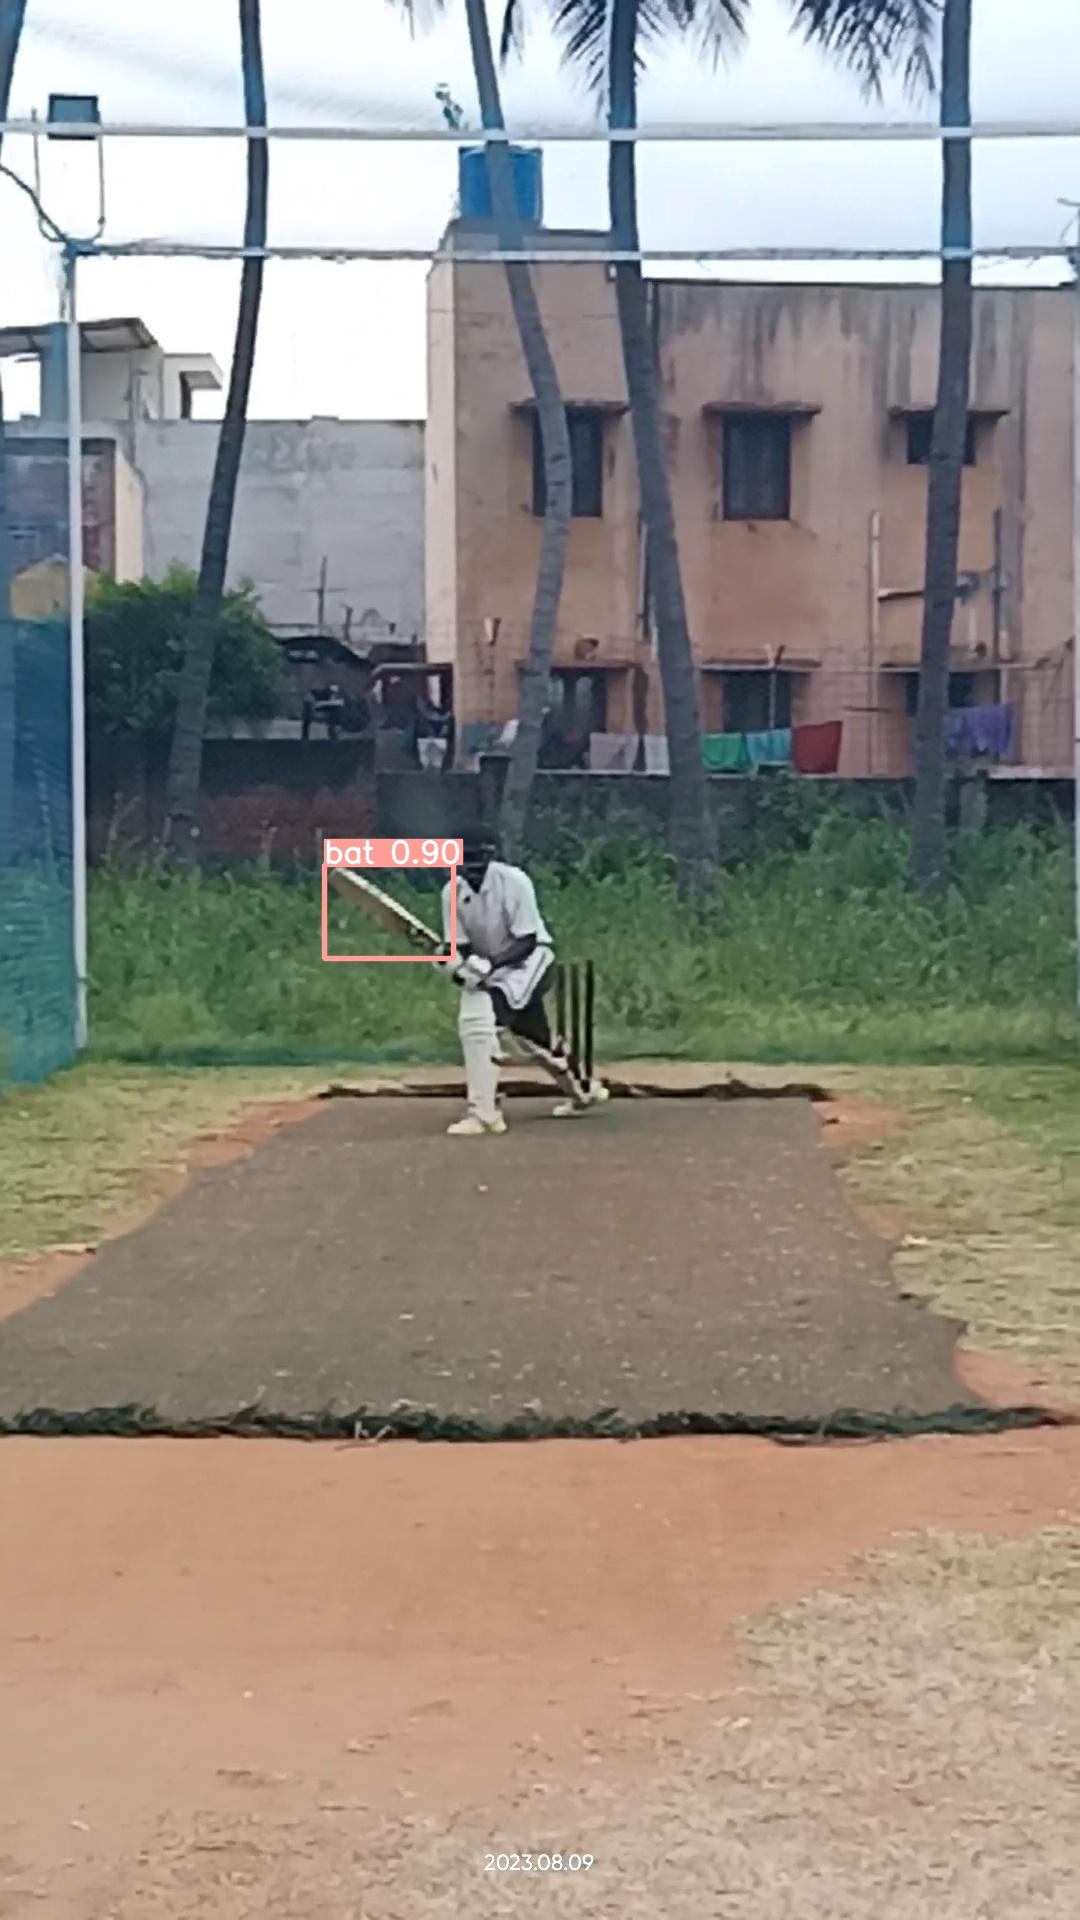

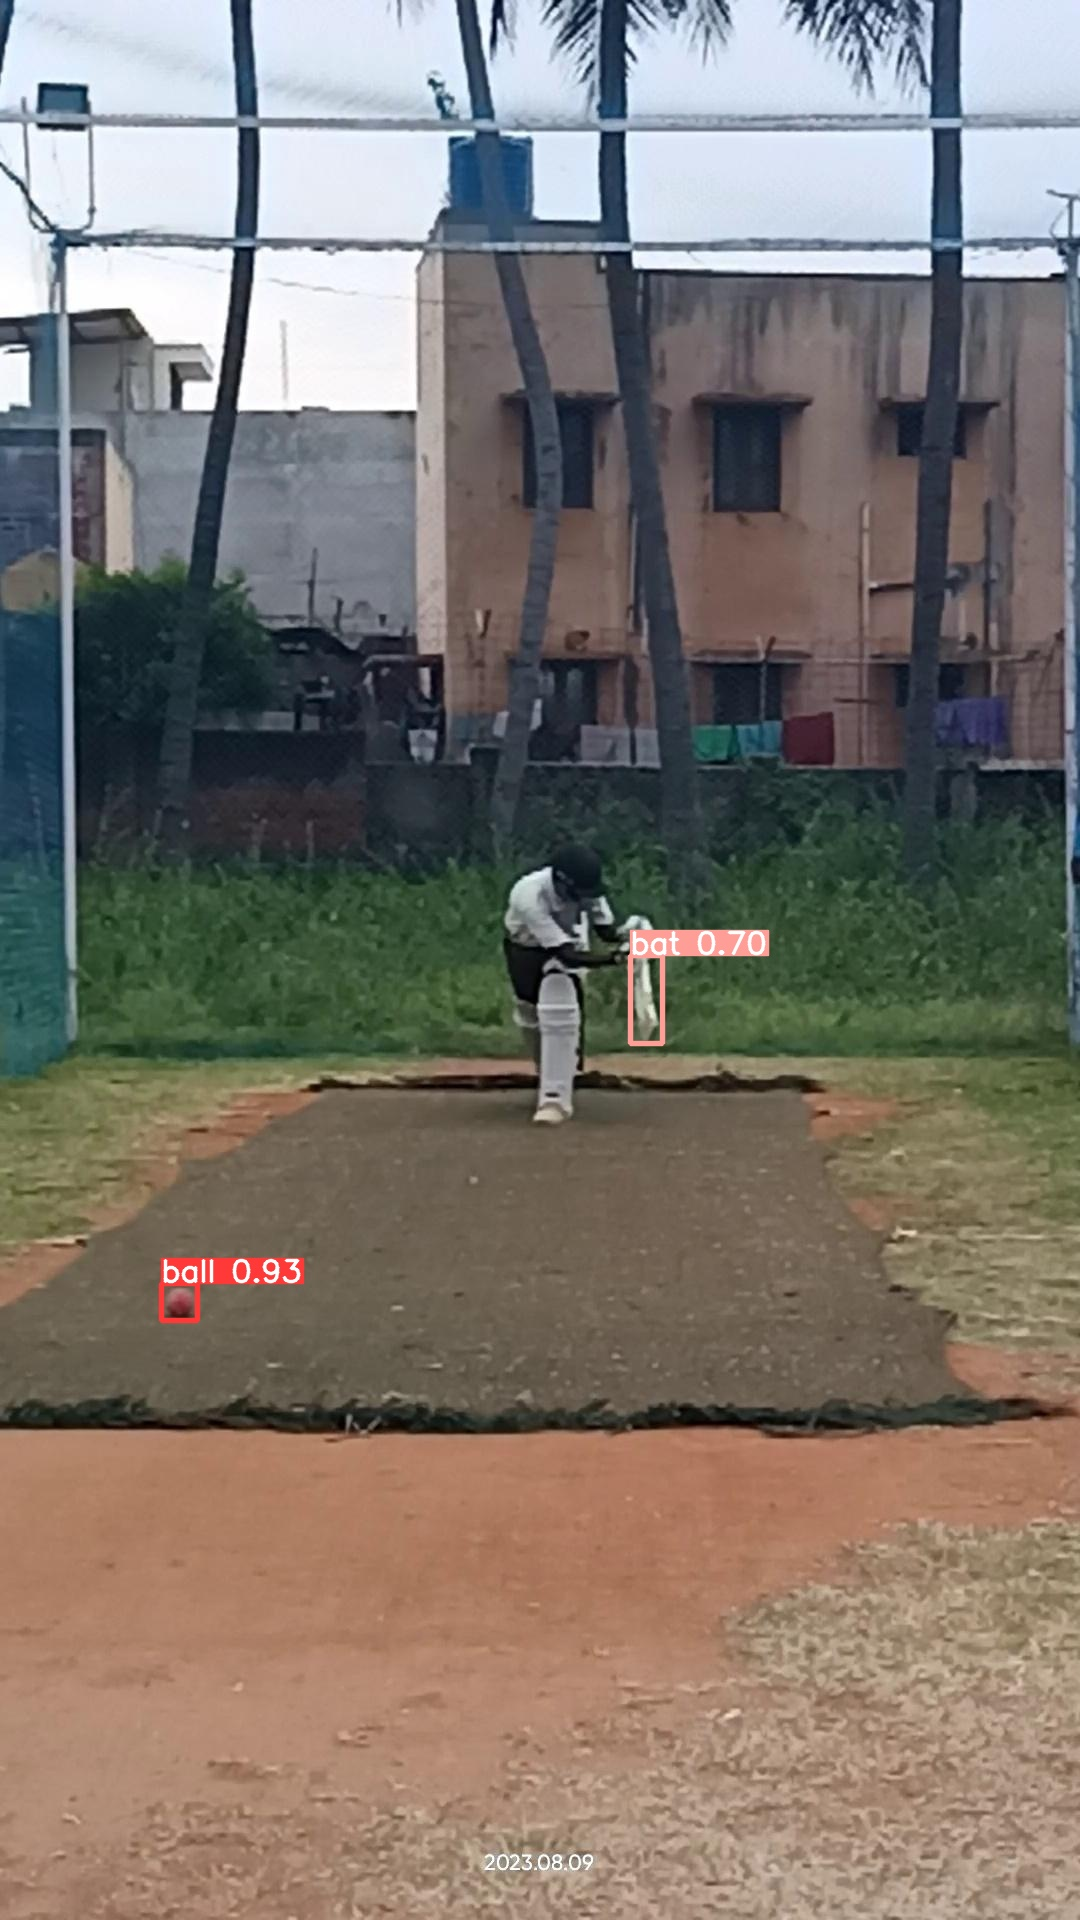

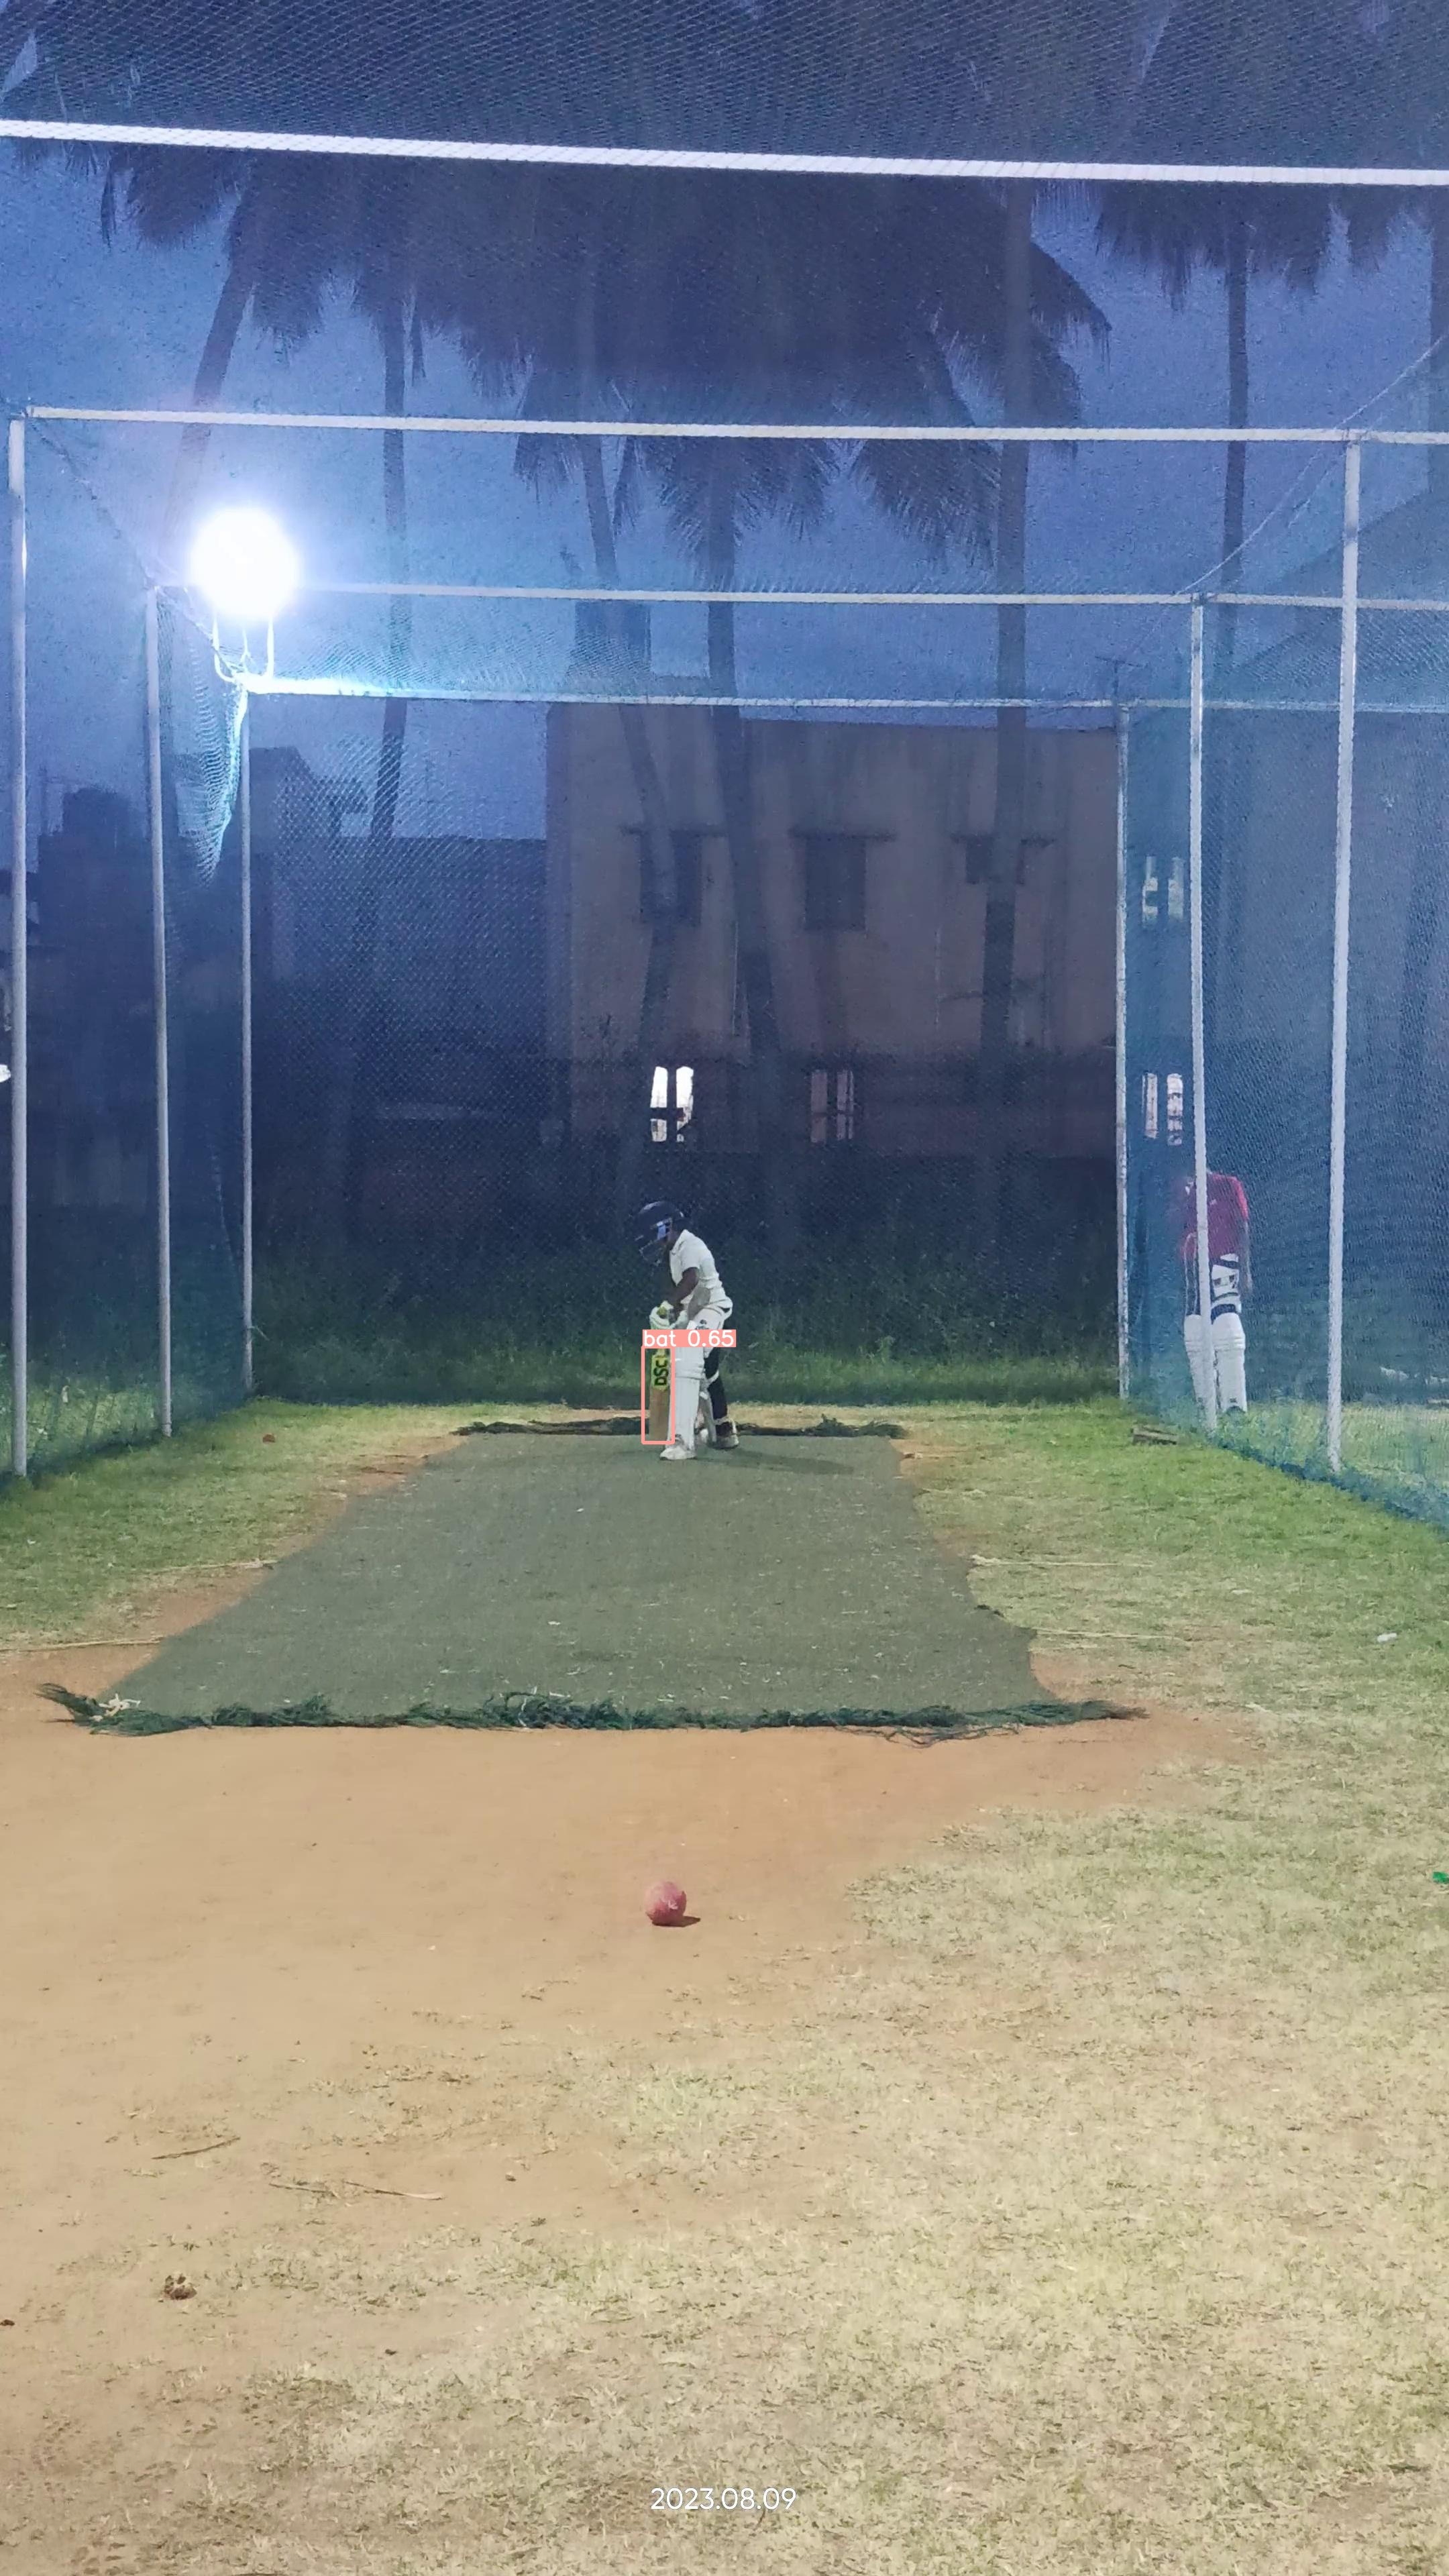

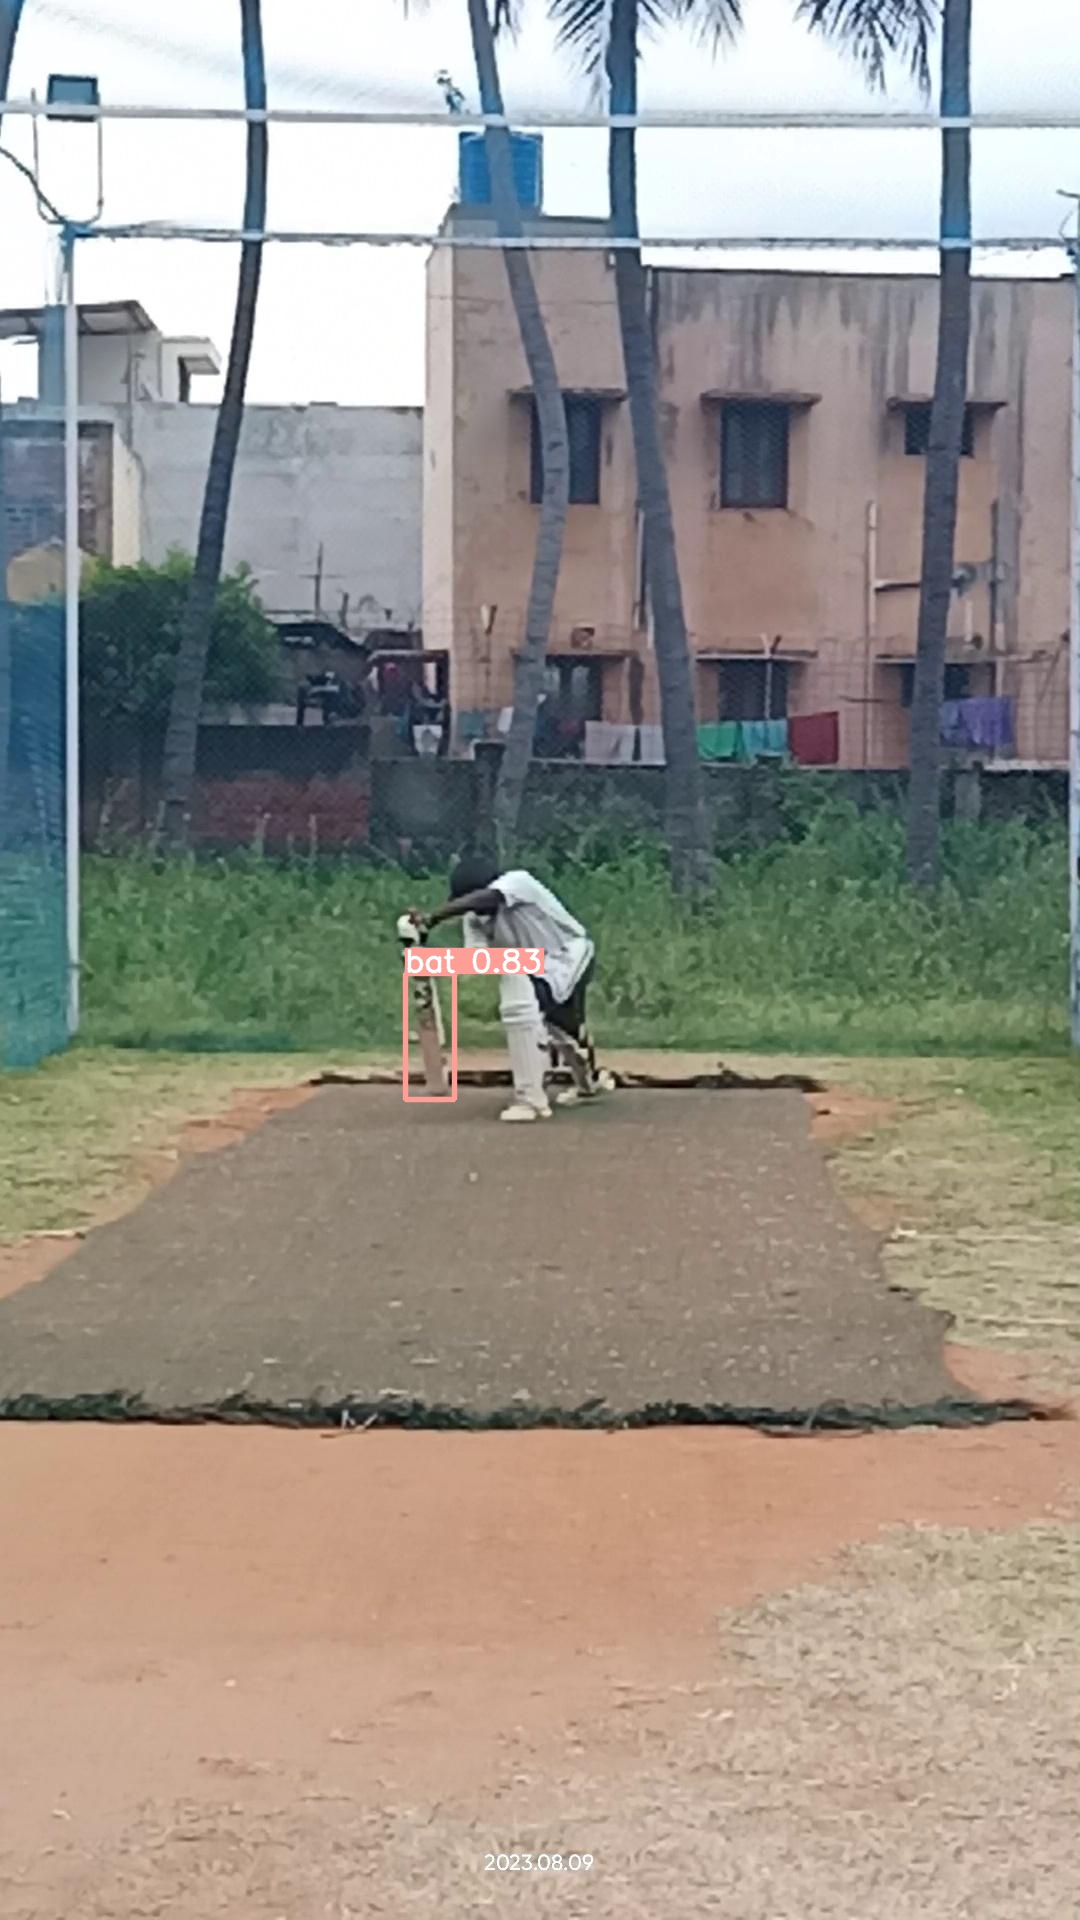

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

## Save Model

In [ ]:
# #export your model's weights for future use
# from google.colab import files
# files.download('./runs/train/exp/weights/best.pt')

In [ ]:
import shutil
from google.colab import files

# Path to the directory you want to zip
directory_path = '/content/yolov5/runs/train/exp'

# Create a zip archive of the directory
shutil.make_archive('/content/exp_archive', 'zip', directory_path)

# Download the zip archive
files.download('/content/exp_archive.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>